In [1]:
%matplotlib inline
import healpy as hp
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
import astropy
import sys
from astropy.io import fits
from astropy.utils.data import download_file
from astropy.table import Table
import matplotlib.cm as cm

In [2]:
cool_cmap = cm.jet
cool_cmap.set_under("w")

In [3]:
url=('https://dcc.ligo.org/P1500071/public'+'/630582_bayestar.fits.gz')
prob = hp.read_map(filename, field=[0])

NameError: name 'filename' is not defined

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


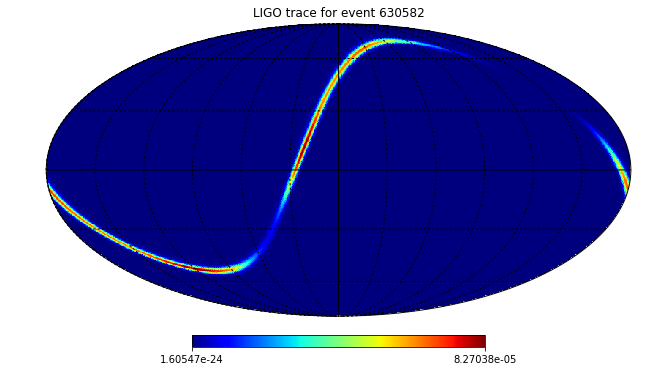

In [84]:
hp.mollview(prob, title="LIGO trace for event 630582", flip='geo', cmap=cool_cmap)
hp.graticule()

In [82]:
t = Table.read('../BNS-MergerRates/skyprior_cbc_hl.fits')

In [83]:
print(t)

       I [1024]       
----------------------
   2.02123 .. 0.586845
   1.42039 .. 0.222135
   1.11351 .. 0.211349
0.550547 .. 0.00805733
  0.947417 .. 0.148804
  0.702658 .. 0.531893
 0.201161 .. 0.0642517
  0.143365 .. 0.671351
  0.684317 .. 0.163496
 0.194145 .. 0.0757354
                   ...
   1.94901 .. 0.429761
   1.21823 .. 0.272729
  0.66232 .. 0.0980084
  0.694768 .. 0.935579
   1.02882 .. 0.751523
   0.554647 .. 1.14569
    0.954589 .. 1.2316
  0.722484 .. 0.325029
  0.256832 .. 0.130851
  0.748428 .. 0.865188
  0.324486 .. 0.572141
Length = 192 rows


In [4]:
chenMap=hp.read_map('../BNS-MergerRates/skyprior_cbc_hl.fits')

NSIDE = 128
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


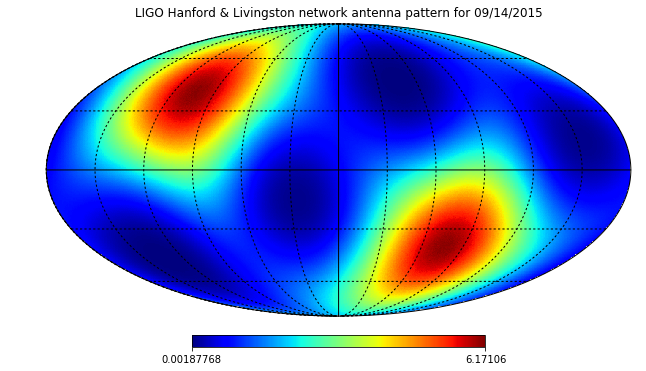

In [5]:
hp.mollview(chenMap, title="LIGO Hanford & Livingston network antenna pattern for 09/14/2015",flip='geo',cmap=cool_cmap)
hp.graticule()

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


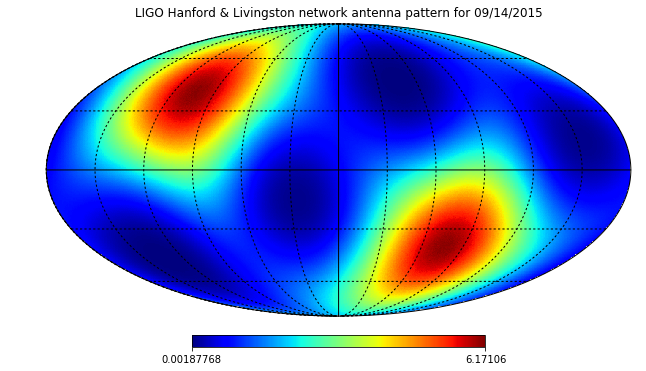

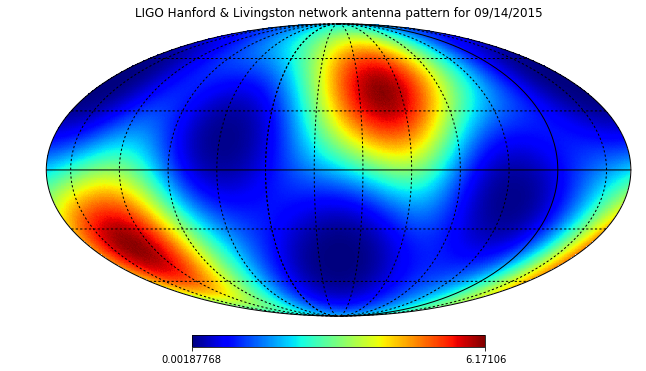

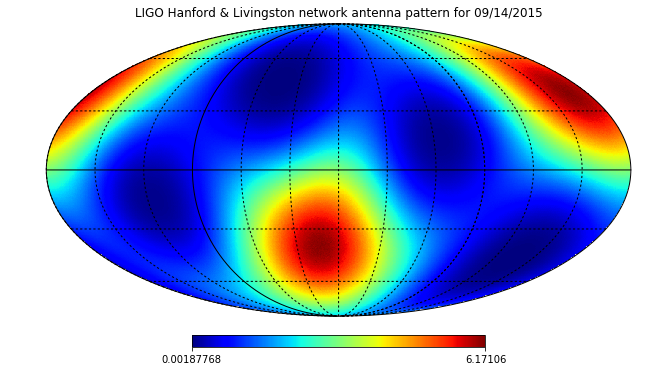

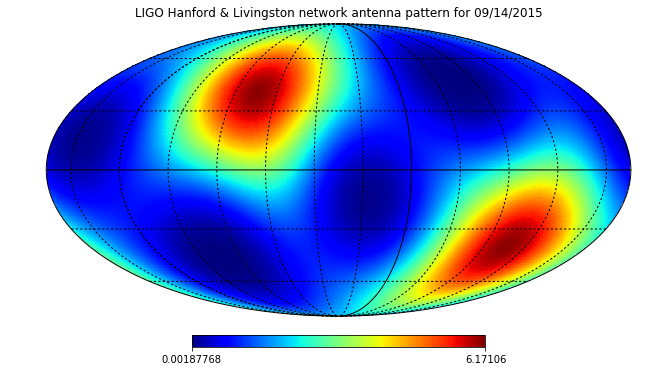

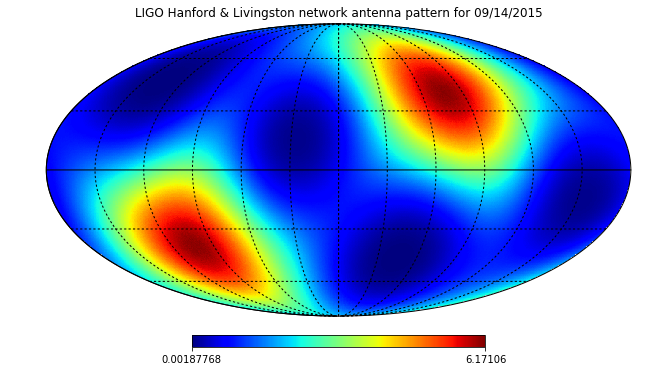

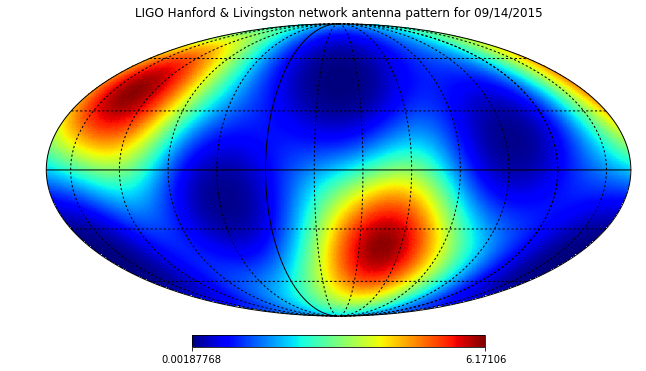

In [8]:
for i in range(0,90,15):
    hp.mollview(chenMap, title="LIGO Hanford & Livingston network antenna pattern for 09/14/2015",rot=(15*i,0,0),flip='geo',cmap=cool_cmap)
    hp.graticule()